# Blending and Pasting Images

For some computer vision systems, we'll want to be able to post our own image on top of an already existing image or video. We may also want to blend images, maybe we want to have a "highlight" effect instead of just a solid box or empty rectangle.

Let's explore what is commonly known as **Arithmetic Image Operations** with OpenCV. These are referred to as Arithmetic Operations because OpenCV is simply performing some common math with the pixels for the final effect.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

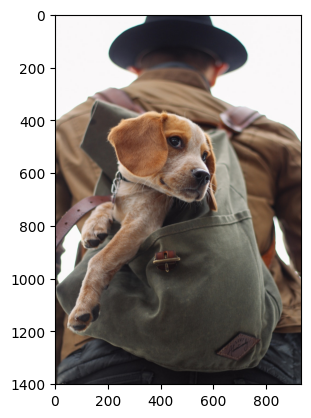

In [3]:
plt.imshow(img1)

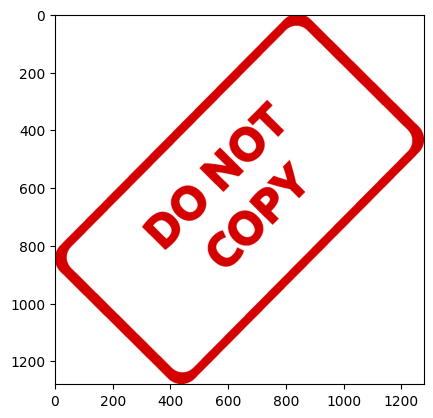

In [4]:
plt.imshow(img2)

## Blending Images of Same Size

### Resizing the Images

Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000

In [5]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

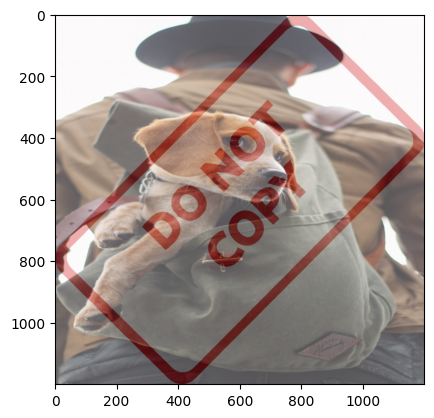

In [6]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)
plt.imshow(blended)

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [7]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600, 600))

In [8]:
large_img = img1
small_img = img2

In [9]:
x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

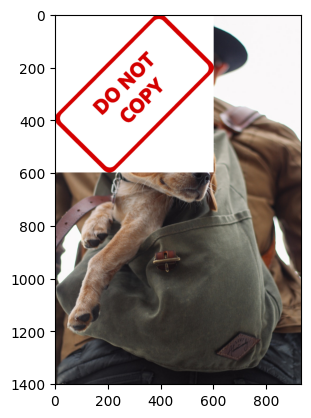

In [10]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

## Blending Images of Different Sizes

In [11]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600, 600))

In [12]:
large_img = img1
small_img = img2

### Create a Region of Interest (ROI)

In [13]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

x_end = large_img.shape[1]
y_end = large_img.shape[0]

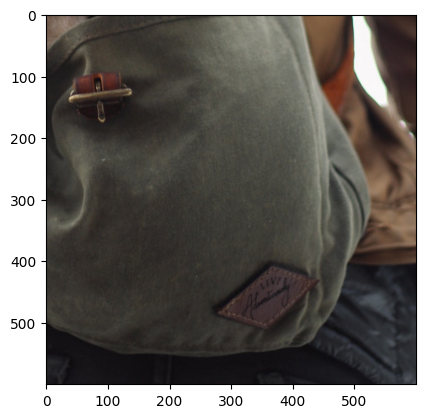

In [14]:
roi = img1[y_offset:y_end, x_offset:x_end] # BOTTOM RIGHT CORNER
plt.imshow(roi)

### Create a Mask

In [15]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
mask_inv = cv2.bitwise_not(small_img_gray)

# Convert Mask to have 3 channels
white_background = np.full(small_img.shape, 255, dtype=np.uint8)
bg = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
fg = cv2.bitwise_or(small_img, small_img, mask=mask_inv)

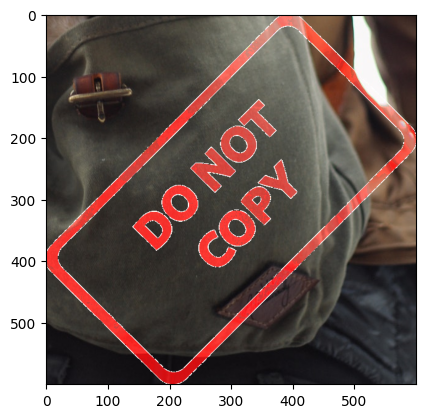

In [16]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

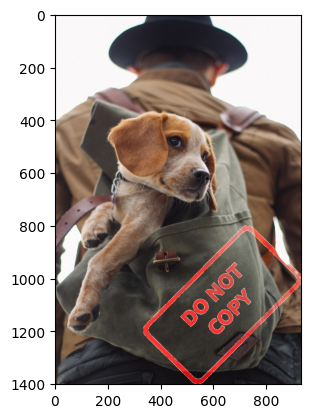

In [17]:
large_img[y_offset:y_end, x_offset:x_end] = final_roi
plt.imshow(large_img)